In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent.parent))

In [3]:
%load_ext autoreload
%autoreload 2
from typing import List

import gym_minigrid  # noqa: F401
import gymnasium as gym

import matplotlib.pyplot as plt
from IPython.display import Video


import specless as sl
from specless.minigrid.tspenv import TSPBenchmarkEnv

LOG_DIR = Path.cwd().joinpath(".log")
print(str(LOG_DIR))

/Users/kandai/Documents/projects/dev/specless/examples/VisitMultiColoredLocations/.log


left
right
forward
pickup
drop
toggle
done


/usr/local/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.actions to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.actions` for environment variables or `env.get_wrapper_attr('actions')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


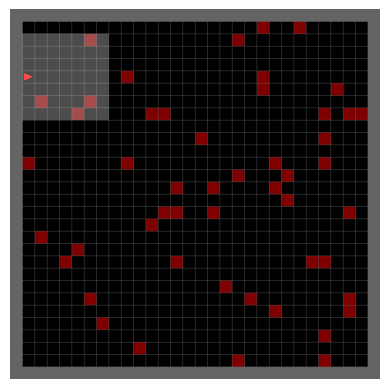

In [6]:
ENV_ID = "MiniGrid-TSPBenchmarkEnv-v0"
env = gym.make(
    ENV_ID,
    num_locations=50,
    width=30,
    height=30,
    agent_start_pos=(1, 5),
    render_mode="rgb_array",
)
for action in env.actions:
    print(action.name)
env.reset()
plt.imshow(env.render())
plt.axis("off")
plt.show()

# MiniGrid Trnasition System Wrapper contains
-  Action Wrapper (Can change actions)
- Label MiniGrid Wrapper (add label to the state observation)
- Add PosDir To MiniGrid Wrapper (add position and direction to the state observation)

In [4]:
env = sl.MiniGridTransitionSystemWrapper(env, ignore_direction=True)

for action in env.actions:
    print(action.name)

north
south
east
west


In [5]:
algorithm = sl.TSPSynthesisAlgorithm()
strategy = algorithm.synthesize(env, None, num_agent=1)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-14
edges[0,2]: 1.0
edges[0,4]: 1.0
edges[0,5]: 1.0
edges[1,0]: 1.0
edges[2,0]: 1.0
edges[3,1]: 1.0
edges[4,3]: 1.0
edges[5,0]: 1.0
times[1]: 42.0
times[2]: 21.0
times[3]: 30.0
times[4]: 28.0
times[5]: 26.0
timesTerminal[0,0]: 52.0
timesTerminal[1,0]: 52.0
timesTerminal[2,0]: 52.0
tFinal: 52.0
Total matching score: 51.999999999999986


In [6]:
# env = sl.MiniGridTransitionSystemWrapper(env)
#
# ##### Convert a Transition System from an OpenAI Gym Environment (env)
# tsbuilder = sl.TSBuilder()
# transition_system = tsbuilder(env)

# ##### Convert the Transition System to a Traveling Saleseman Problem
# tspbuilder = sl.TSPBuilder()
# # TODO - 2: Create a Specification Class with just a list of nodes
# tsp: sl.TSP = tspbuilder(transition_system, uniquelabel=False)

# print(tsp)

# ##### Solve the TSP and obtain tours
# tspsolver = sl.MILPTSPSolver()
# tours, cost = tspsolver.solve(tsp, num_agent=3)

# print("Tours: ", tours)

# ##### Map the tours back onto the OpenAI Gym Environment to obtain a controller(s) (a sequence of actions)
# # TODO: Inlucd the actions -> strategy conversions into the adapter
# actions: List[ActType] = [tspbuilder.map_back_to_controls(tour) for tour in tours]

# if len(actions) == 0:
#     assert False
# ##### Convert a sequences of actions to a strategy class.
# if len(actions) == 1:
#     strategy = sl.PlanStrategy(actions[0])
# else:
#     strategy = sl.CombinedStrategy([sl.PlanStrategy(action) for action in actions])

# for obs, states in tspbuilder.obs_to_states.items():
#     print(obs)
#     uniques = set()
#     for state in states:
#         p, d = state
#         if p in uniques:
#             continue
#         uniques.add(p)
#         print(f"\t{p}")

# state, info = env.reset()
# print("Initial State: ", state["pos"], state["dir"])

In [7]:
env = sl.TerminateIfNoStrategyWrapper(env)

In [8]:
import os

# TODO: Simply change it to the following using MultiAgentWrapper()
# states, actions = sl.simulate(env, strategy)
# print(states, actions)

# TODO: Implement MultiAgentWrapper
# This should hold multiple envs.
if isinstance(strategy, sl.CombinedStrategy):
    for i, s in enumerate(strategy.strategies):
        print(f"Agent {i+1}: ")
        states, actions, video_path = sl.simulate(
            env,
            s,
            record_video=True,
            video_folder=os.path.join(LOG_DIR, str(i)),
        )
        Video(video_path, embed=True, html_attributes="controls muted autoplay loop")
else:
    states, actions, video_path = sl.simulate(
        env, strategy, record_video=True, video_folder=LOG_DIR
    )
    Video(video_path, embed=True, html_attributes="controls muted autoplay loop")
    print(states, actions)

Agent 1: 


/usr/local/lib/python3.11/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /Users/kandai/Documents/projects/dev/specless/examples/VisitMultiColoredLocations/.log/0 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /Users/kandai/Documents/projects/dev/specless/examples/VisitMultiColoredLocations/.log/0/rl-video-step-0.mp4.
Moviepy - Writing video /Users/kandai/Documents/projects/dev/specless/examples/VisitMultiColoredLocations/.log/0/rl-video-step-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/kandai/Documents/projects/dev/specless/examples/VisitMultiColoredLocations/.log/0/rl-video-step-0.mp4
Agent 2: 


/usr/local/lib/python3.11/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /Users/kandai/Documents/projects/dev/specless/examples/VisitMultiColoredLocations/.log/1 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /Users/kandai/Documents/projects/dev/specless/examples/VisitMultiColoredLocations/.log/1/rl-video-step-0.mp4.
Moviepy - Writing video /Users/kandai/Documents/projects/dev/specless/examples/VisitMultiColoredLocations/.log/1/rl-video-step-0.mp4



/usr/local/lib/python3.11/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /Users/kandai/Documents/projects/dev/specless/examples/VisitMultiColoredLocations/.log/2 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Done !
Moviepy - video ready /Users/kandai/Documents/projects/dev/specless/examples/VisitMultiColoredLocations/.log/1/rl-video-step-0.mp4
Agent 3: 
Moviepy - Building video /Users/kandai/Documents/projects/dev/specless/examples/VisitMultiColoredLocations/.log/2/rl-video-step-0.mp4.
Moviepy - Writing video /Users/kandai/Documents/projects/dev/specless/examples/VisitMultiColoredLocations/.log/2/rl-video-step-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/kandai/Documents/projects/dev/specless/examples/VisitMultiColoredLocations/.log/2/rl-video-step-0.mp4
